In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import unicodedata
import nltk

import prep
from env import get_db_url

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

In [4]:
url = get_db_url('spam_db')

df = pd.read_sql('SELECT * FROM spam', url)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5572 non-null   int64 
 1   label   5572 non-null   object
 2   text    5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
ham_words = prep.basic_clean(' '.join(df[df.label == 'ham'].text))
spam_words = prep.basic_clean(' '.join(df[df.label == 'spam'].text))
all_words = prep.basic_clean(' '.join(df.text))

In [6]:
ham_words

"go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni u dun say so early hor u c already then say nah i don't think he goes to usf he lives around here though even my brother is not like to speak with me they treat me like aids patent as per your request 'melle melle oru minnaminunginte nurungu vettam' has been set as your callertune for all callers press 9 to copy your friends callertune i'm gonna be home soon and i don't want to talk about this stuff anymore tonight k i've cried enough today i've been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times i have a date on sunday with will oh ki'm watching here eh u remember how 2 spell his name yes i did he v naughty make until i v wet fine if thataos the way u feel thataos the way its gota b is that seriously how you spell his name i

In [7]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']

word_counts.info()
word_counts.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9662 entries, i to now1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ham     9662 non-null   int64
 1   spam    9662 non-null   int64
 2   all     9662 non-null   int64
dtypes: int64(3)
memory usage: 301.9+ KB


,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [8]:
word_counts.sort_values('all', ascending=False).head(20)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,755,29,784


In [9]:
word_counts.sort_values(['ham', 'spam'], ascending=[True, False]).head(20)

,ham,spam,all
claim,0,113,113
prize,0,92,92
won,0,73,73
guaranteed,0,50,50
tone,0,48,48
18,0,43,43
awarded,0,38,38
a1000,0,35,35
150ppm,0,34,34
a2000,0,31,31


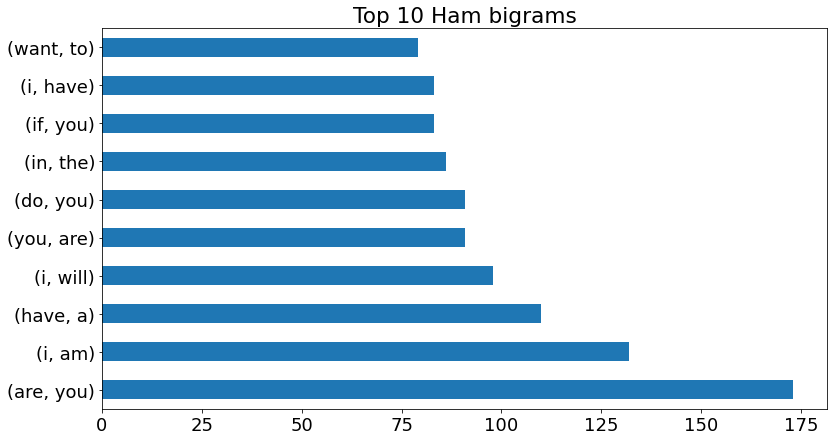

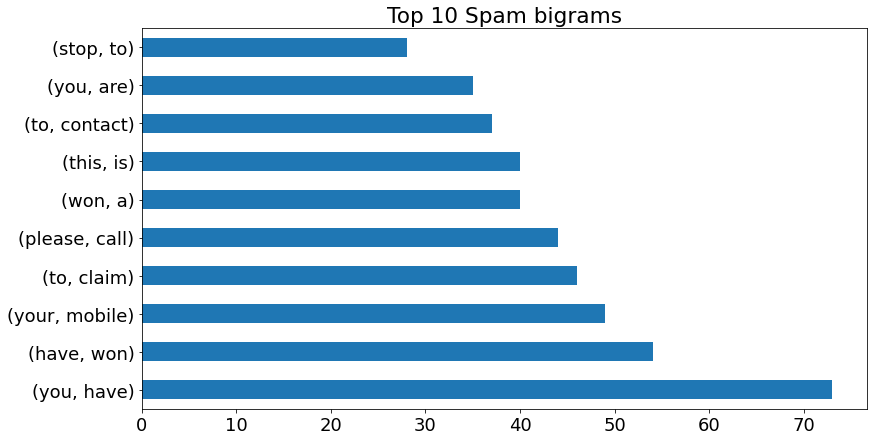

Text(0.5, 1.0, 'Top 10 of All bigrams')

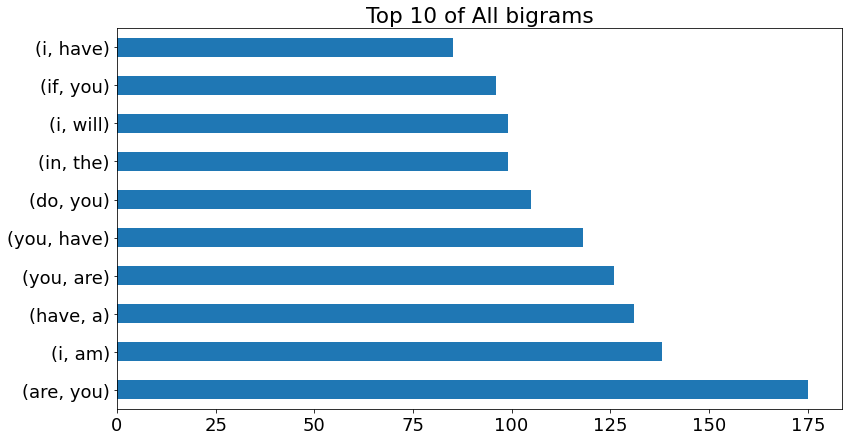

In [64]:
ham_bigrams = nltk.ngrams(ham_words.split(), 2)
spam_bigrams = nltk.ngrams(spam_words.split(), 2)
all_bigrams = nltk.ngrams(all_words.split(), 2)

plt.rc('figure', figsize=(13,7))
plt.rc('font', size= 18)
pd.Series(ham_bigrams).value_counts().head(10).plot.barh()
plt.title('Top 10 Ham bigrams')

plt.show()
pd.Series(spam_bigrams).value_counts().head(10).plot.barh()
plt.title('Top 10 Spam bigrams')

plt.show()
pd.Series(all_bigrams).value_counts().head(10).plot.barh()
plt.title('Top 10 of All bigrams')

In [73]:
hamstrung_bigrams = ' '.join((pd.Series(nltk.ngrams(ham_words.split(), 2))).astype('string'))
spamstrung_bigrams = ' '.join((pd.Series(nltk.ngrams(spam_words.split(), 2))).astype('string'))
allstrung_bigrams = ' '.join((pd.Series(nltk.ngrams(all_words.split(), 2))).astype('string'))

type(hamstrung_bigrams)


str

In [27]:
spam_bigrams

<generator object bigrams at 0x7fca1266f970>

<AxesSubplot:>

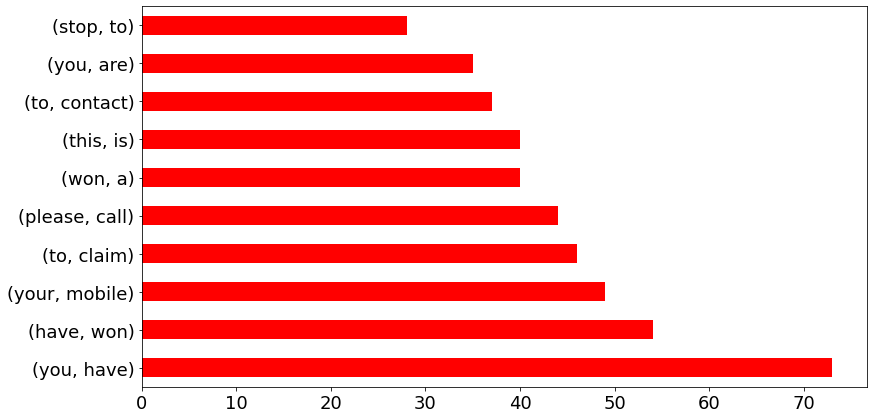

In [42]:
pd.Series(list(nltk.bigrams(spam_words.split()))).value_counts().head(10).plot.barh(color='red')

In [45]:
ham_trigrams = pd.Series(nltk.ngrams(ham_words.split(), 3))
ham_trigrams.value_counts().head(20)

(i'll, call, later)    39
(sorry, i'll, call)    38
(how, are, you)        35
(i, want, to)          29
(let, me, know)        26
(have, a, great)       25
(i, miss, you)         24
(i, love, you)         23
(hope, you, are)       20
(i, have, to)          20
(give, me, a)          19
(happy, new, year)     18
(do, have, a)          17
(a, great, day)        17
(you, want, to)        16
(what, are, you)       16
(are, you, doing)      16
(i, will, be)          16
(where, are, you)      16
(u, wan, 2)            16
dtype: int64

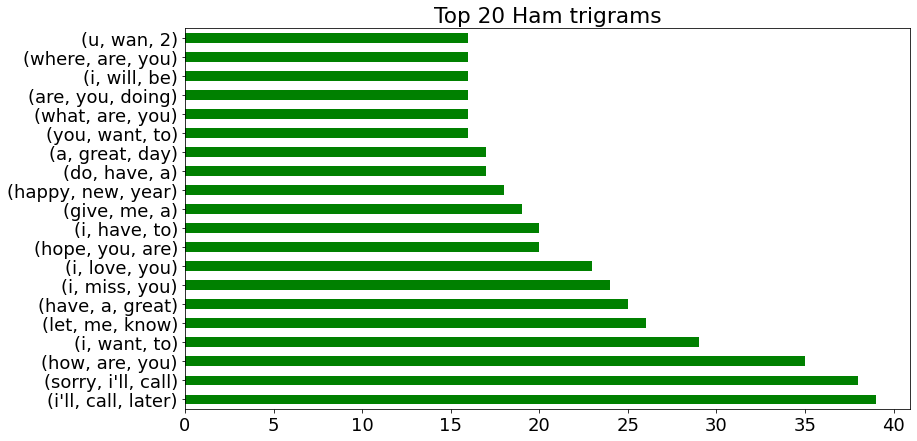

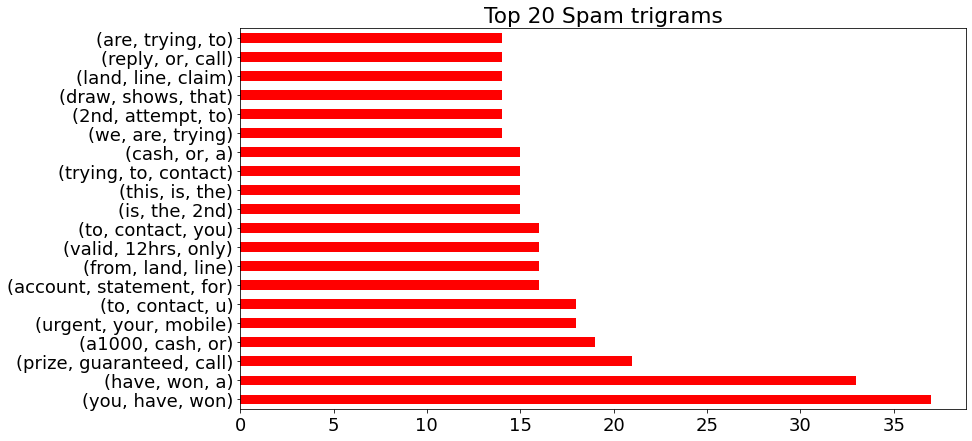

Text(0.5, 1.0, 'Top 20 trigrams')

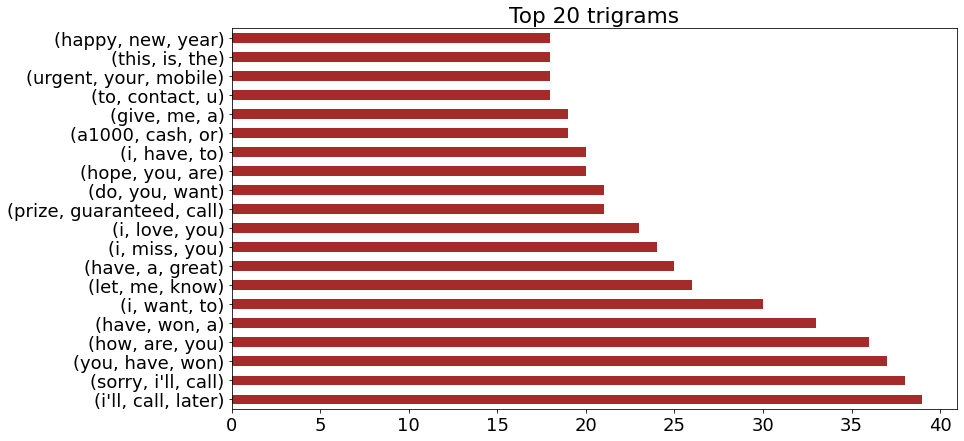

In [50]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words.split(), 3))
all_trigrams = pd.Series(nltk.ngrams(all_words.split(), 3))

ham_trigrams.value_counts(ascending=False).head(20).plot.barh(color='green')
plt.title('Top 20 Ham trigrams')

plt.show()

spam_trigrams.value_counts(ascending=False).head(20).plot.barh(color='red')
plt.title('Top 20 Spam trigrams')

plt.show()

all_trigrams.value_counts(ascending=False).head(20).plot.barh(color='brown')
plt.title('Top 20 trigrams')



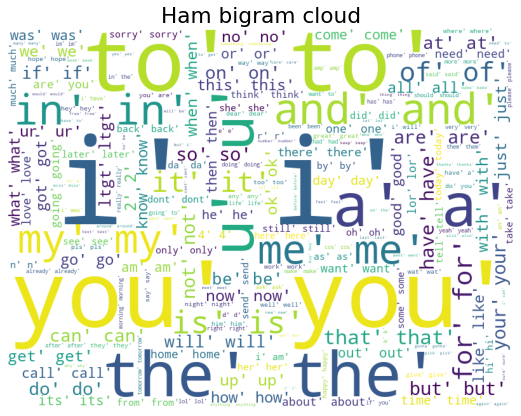

Text(0.5, 1.0, 'Spam bigram cloud')

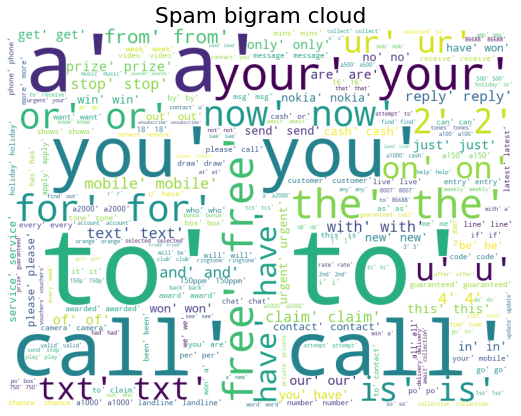

In [75]:
img1 = WordCloud(background_color='white', width=800, height=600).generate_from_text(hamstrung_bigrams)
plt.imshow(img1)
plt.axis('off')
plt.title('Ham bigram cloud')

plt.show()

img2 = WordCloud(background_color='white', width=800, height=600).generate_from_text(spamstrung_bigrams)
plt.imshow(img2)
plt.axis('off')
plt.title('Spam bigram cloud')



In [67]:
spam_bigrams

In [56]:
df[df.label == 'ham'].text.str.contains('ltgt').sum()

0